In [1]:
# Importing computational packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report
pd.set_option("display.max_columns", 100)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.shape

(284807, 31)

In [5]:
#observe the different feature type present in the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**As we can see from the above result, except for time all the other features are of type float**.

In [6]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = True)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = True)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V28,V27,V26,V25,V24,V23,V22,V21,V20,V19,V18,V17,V16,Amount,V15,V13,V12,V11,V10,V9,V8,V7,V6,V5,V4,V3,V2,V1,V14,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**As we can see from the above data, there are no empty/null values in our dataset.**

**Here we will observe the distribution of our classes**

In [7]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
normal_share, fraud_share

(99.83, 0.17)

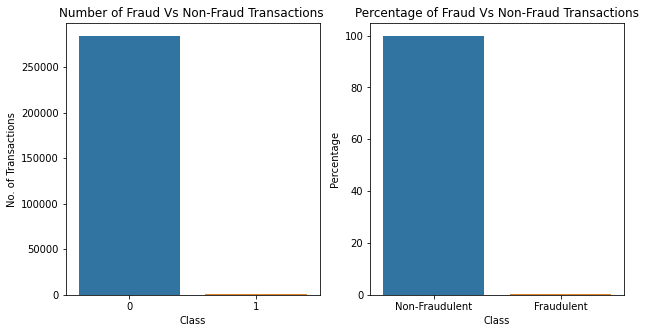

In [8]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.xlabel("Class")
plt.ylabel("No. of Transactions")
plt.title("Number of Fraud Vs Non-Fraud Transactions ")

plt.subplot(1,2,2)
percentage_fraud = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_percentage_fraud = pd.DataFrame(percentage_fraud) 
sns.barplot(x='Class',y='Percentage', data=df_percentage_fraud)
plt.title('Percentage of Fraud Vs Non-Fraud Transactions')

plt.show()

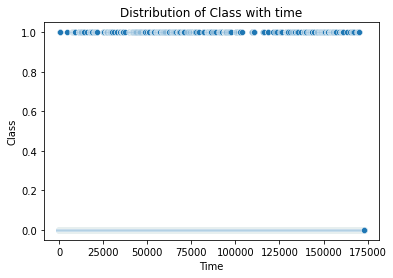

In [9]:
# Create a scatter plot to observe the distribution of classes with time

sns.scatterplot(df["Time"], df["Class"])
plt.title("Distribution of Class with time")
plt.show()

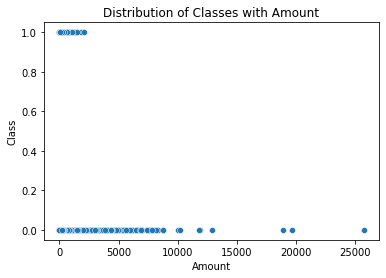

In [10]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df["Amount"], df["Class"])
plt.title("Distribution of Classes with Amount")
plt.show()

**This shows that there is a greater chance for a transaction to be fraudlent if the amount was low.**

In [11]:
# Drop unnecessary columns
# We will go ahead and drop the time column as its not required
df = df.drop("Time", axis = 1)

**Splitting the data into train & test data**

In [12]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [14]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


**Plotting the distribution of a variable to handle skewness**

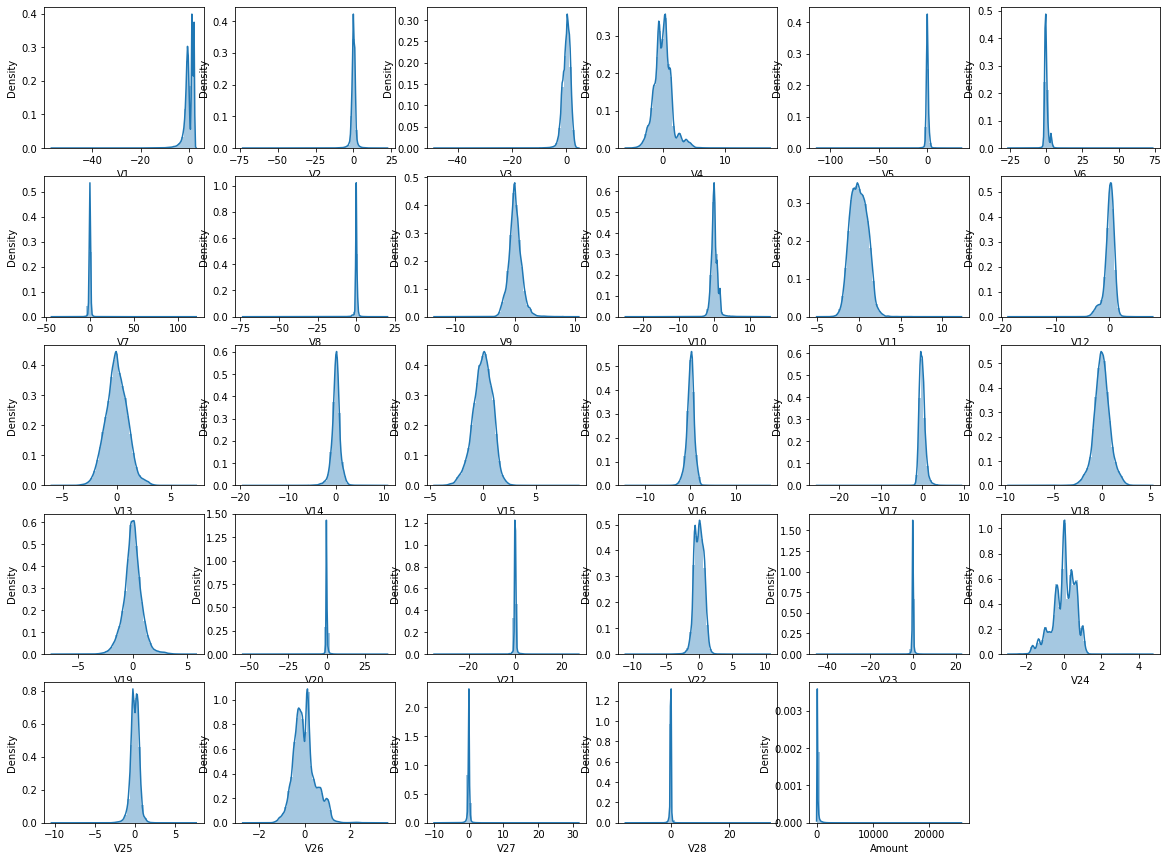

In [15]:
# plot to visualize the skewness
allXColumns = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in allXColumns:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [16]:
#As we can see that quite a few features which are skewed. So now we will check for the individual skewness of the features.

cols = X_train.columns
skew_list = []
for i in cols:
    skew_list.append(X_train[i].skew())

skew_df = pd.concat([pd.DataFrame(cols, columns=["features"]), pd.DataFrame(skew_list, columns=["skewed"])], axis=1)
skew_df.head()

,features,skewed
0,V1,-3.320269
1,V2,-4.826847
2,V3,-2.219375
3,V4,0.677776
4,V5,-2.928646


In [17]:
skew_df.set_index("features", inplace=True)
skew_df.head()

,skewed
features,
V1,-3.320269
V2,-4.826847
V3,-2.219375
V4,0.677776
V5,-2.928646


In [18]:
#If the skewness is less than -1 or greater than 1, the data is highly skewed

skewed_data = skew_df.loc[(skew_df['skewed']>1) | (skew_df['skewed']<-1)].index
skewed_data

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='features')

**There is skewness present in the distribution hence we will use Power Transformer package present in the preprocessing library**

In [19]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed_data] = pt.fit_transform(X_train[skewed_data])

# Transforming the test data
X_test[skewed_data] = pt.transform(X_test[skewed_data])

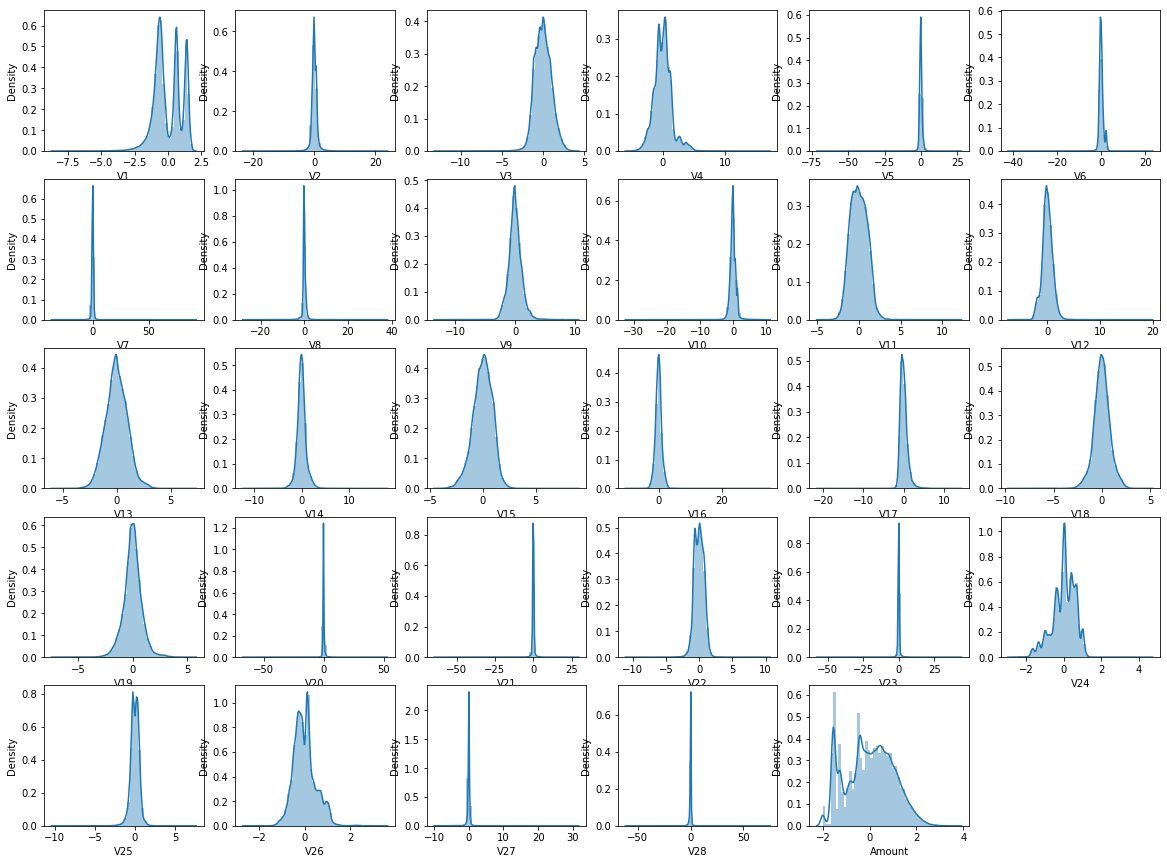

In [20]:
# plot the histogram of a variable from the dataset again to see the result 
cols = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in cols:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [21]:
#Since amount is the only feature which has not been scaled, so we will go ahead and apply standarscalar to the amount variable.

scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

**Model Building with imbalanced data**

We will try to build models using the following three algorithms:

1.   Logistic Regression
2.   XGBoost
3.   Decision Tree


  
  

**1) Logistic Regression(imbalanced data)**

In [22]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)

#performing cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   42.8s finished


Best ROC AUC score:  0.9805375255585165
Best hyperparameters:  {'C': 0.01}


In [23]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.633937,0.174081,0.030371,0.002319,0.01,{'C': 0.01},0.968137,0.987400,0.991473,0.972162,0.983515,0.980538,0.008938,1,0.986422,0.981586,0.980499,0.986266,0.981197,0.983194,0.002596
1,2.337850,0.292815,0.031829,0.001972,0.1,{'C': 0.1},0.969588,0.982525,0.987823,0.964751,0.979234,0.976784,0.008455,2,0.983051,0.978430,0.977891,0.984731,0.978841,0.980589,0.002765
2,3.072704,0.170027,0.032388,0.000596,1,{'C': 1},0.970915,0.981471,0.986282,0.962800,0.977630,0.975820,0.008225,3,0.981802,0.977379,0.977265,0.984180,0.978089,0.979743,0.002771
3,3.000995,0.292380,0.030940,0.001355,10,{'C': 10},0.971127,0.981333,0.986081,0.962564,0.977440,0.975709,0.008197,4,0.981640,0.977247,0.977195,0.984110,0.977999,0.979638,0.002770
4,2.763430,0.173869,0.029654,0.001147,100,{'C': 100},0.971152,0.981319,0.986064,0.962545,0.977424,0.975701,0.008194,5,0.981621,0.977234,0.977189,0.984104,0.977989,0.979628,0.002770
5,2.541781,0.204177,0.027372,0.003149,1000,{'C': 1000},0.971156,0.981318,0.986061,0.962544,0.977422,0.975700,0.008193,6,0.981620,0.977234,0.977188,0.984101,0.977989,0.979626,0.002769


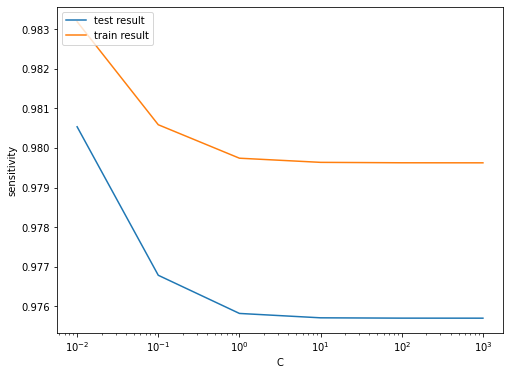

In [24]:
# plotting train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

so the optimal param to selct is 0.01

In [25]:
#Initializing and fitting the model
logistic_reg_imbalanced_model = LogisticRegression(C=0.01)

logistic_reg_imbalanced_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [27]:
# Predictions on the train set
y_train_pred = logistic_reg_imbalanced_model.predict(X_train)

In [28]:
# Predicted probability
y_train_pred_proba = logistic_reg_imbalanced_model.predict_proba(X_train)[:,1]

In [29]:
print(y_train_pred_proba)

[1.39010785e-04 3.79182137e-04 3.83450797e-04 ... 3.84128767e-04
 1.22501505e-05 1.59076805e-04]


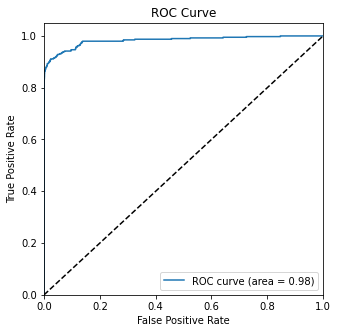

In [30]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [31]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    print("F1 Score: " ,round(f1_score(y_test, y_pred)*100,2)) 
    print("Classification Report: \n",classification_report(y_test, y_pred))

In [32]:
#Metric score for the training data
display_scores(y_train, y_train_pred)

F1 Score:  73.57
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



**Evaluating model on test data**

In [33]:
y_test_pred = logistic_reg_imbalanced_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score:  69.51
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [34]:
# Predicted probability
y_test_pred_proba = logistic_reg_imbalanced_model.predict_proba(X_test)[:,1]

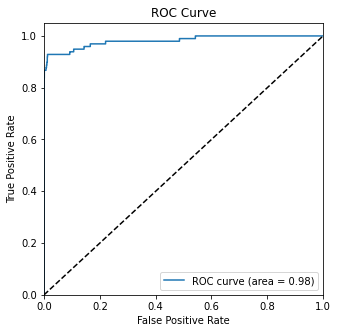

In [35]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Logistic Regression Model** gives the following results on test and train data for imbalanced data:

Train Data:
      Recall = 62
      ,ROC = 0.98

Test Data:
      Recall = 58
      ,ROC = 0.98

**2) Decision Tree(imbalanced data)**

In [36]:
#Parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [37]:
#printing best params
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.838863,0.084057,0.045457,0.001149,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912639,0.919716,0.951703,0.928019,0.016994,7
1,5.911085,0.134305,0.041457,0.001365,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.912640,0.919716,0.951703,0.928020,0.016994,6
2,6.073505,0.097247,0.040589,0.002101,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
3,6.063408,0.100624,0.040262,0.000714,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
4,11.733085,0.015370,0.044894,0.002692,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.942355,0.931260,0.915743,0.929786,0.010914,4
5,11.547016,0.160604,0.048380,0.001808,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.927447,0.916384,0.923242,0.922357,0.004559,8
6,11.605823,0.072531,0.042735,0.000347,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948446,0.930700,0.908149,0.929099,0.016490,5
7,11.502534,0.027968,0.039677,0.004435,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.955826,0.930696,0.908149,0.931557,0.019474,3


In [38]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9338362614319525
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [39]:
# Model with optimal hyperparameters
dt_imbalanced_data_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_imbalanced_data_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [40]:
#Prediciting on train data
y_train_pred = dt_imbalanced_data_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score:  72.33
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



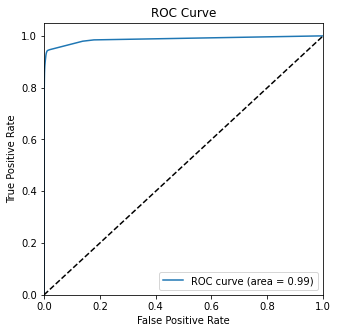

In [41]:
# Predicted probability
y_train_pred_proba = dt_imbalanced_data_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [42]:
#predicting on the test dataset
y_test_pred = dt_imbalanced_data_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score:  71.88
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



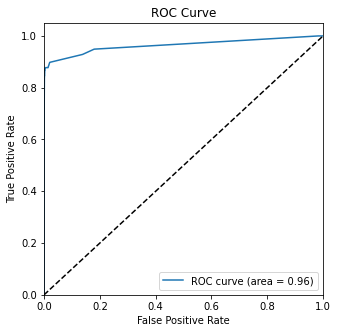

In [43]:
# Predicted probability
y_test_pred_proba = dt_imbalanced_data_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Decision Tree Model** gives the following results on test and train data for imbalanced data:

Train Data:
      Recall = 68
      ,ROC = 0.99

Test Data:
      Recall = 70
      ,ROC = 0.96

**3) XGBoost(imbalanced data)**

In [44]:
# creating a KFold object 
n_folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          

# specify model
xgb_model = XGBClassifier()

model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = n_folds, 
                        verbose = 1,
                        return_train_score=True)
# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 10.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [45]:
# best params
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,27.832432,0.054427,0.284287,0.014785,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.965319,0.977254,0.983691,0.975421,0.007611,4,0.999439,0.999738,0.999605,0.999594,0.000123
1,36.022261,0.110844,0.291841,0.007123,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.973382,0.981686,0.988143,0.981070,0.006042,2,0.999976,0.999981,0.999933,0.999964,0.000022
2,38.055152,0.108535,0.289397,0.002372,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.983208,0.974223,0.986623,0.981351,0.005229,1,0.999972,0.999968,0.999955,0.999965,0.000007
3,29.017758,0.704587,0.314818,0.004082,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.954284,0.951459,0.981057,0.962267,0.013337,6,0.999923,0.999946,0.999932,0.999934,0.000010
4,35.987954,0.583085,0.317725,0.009411,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975700,0.963564,0.986376,0.975213,0.009319,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,37.317270,0.747109,0.318222,0.003404,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.977752,0.974160,0.986365,0.979426,0.005121,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [46]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.981351176228969
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)
{'learning_rate': 0.2, 'subsample': 0.9}


In [47]:
# Building model with best params
params = {'learning_rate': 0.2,
          'max_depth': 3, 
          'n_estimators':100,
          'subsample':0.9,
          'objective':'binary:logistic'}

In [48]:
# fit model on training data
xgb_imbalanced_data_model = XGBClassifier(params = params)
xgb_imbalanced_data_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [49]:
# Predicting on train data
y_train_pred = xgb_imbalanced_data_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score:  89.5
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.97      0.83      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.92      0.95    227845
weighted avg       1.00      1.00      1.00    227845



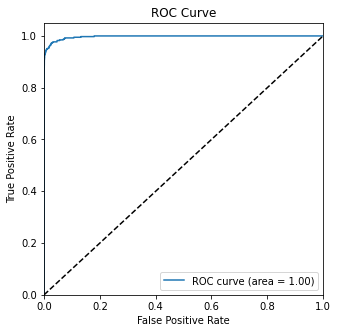

In [50]:
# Predicted probability
y_train_pred_proba_imbalanced_xgb = xgb_imbalanced_data_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imbalanced_xgb)

In [51]:
# Predictions on the test set
y_test_pred = xgb_imbalanced_data_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score:  86.96
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



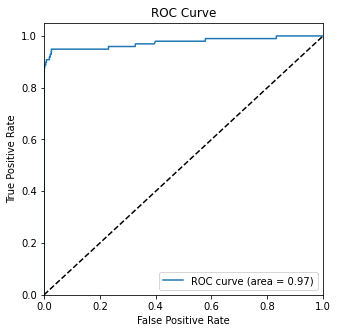

In [52]:
# Predicted probability
y_test_pred_proba = xgb_imbalanced_data_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**XGBoost Model** gives the following results on test and train data for imbalanced data:

Train Data:
      Recall = 83
      ,ROC = 1.00

Test Data:
      Recall = 82
      ,ROC = 0.97

**XGBoost Model seems to be giving the best performance among the three models we have used. Now we will have a look at the important features of the best model to understand the dataset better.**

Top var = 17
2nd Top var = 14
3rd Top var = 10


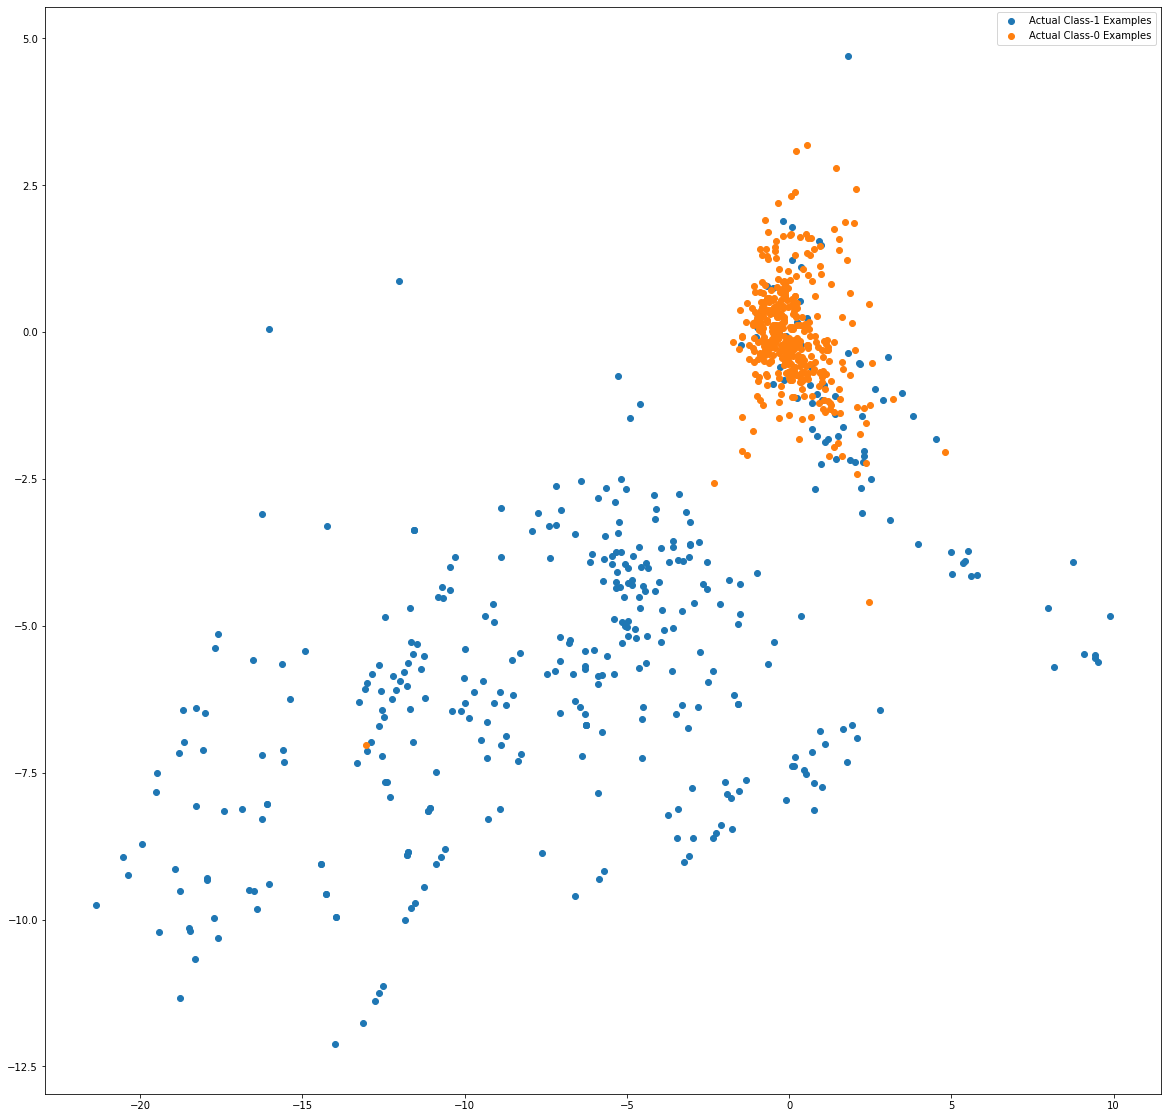

In [53]:
var_imp = []
for i in xgb_imbalanced_data_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imbalanced_data_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imbalanced_data_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imbalanced_data_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imbalanced_data_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imbalanced_data_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

**Model building with balancing Classes**


Perform class balancing with :

  Random Oversampling,SMOTE & ADASYN

**Random Oversampling**

In [54]:
from imblearn.over_sampling import RandomOverSampler

oversampleer_obj = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over_sampled, y_over_sampled = oversampleer_obj.fit_resample(X_train, y_train)

In [55]:
from collections import Counter
print('Before sampling class distribution:-',Counter(y_train)) 
print('New class distribution:-',Counter(y_over_sampled))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


**Logistic Regression(Randome Oversampled data)**

In [56]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over_sampled, y_over_sampled)
print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.4min finished


Best ROC AUC score:  0.9874148395128872
Best hyperparameters:  {'C': 1000}


In [57]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.358230,0.504752,0.051583,0.001486,0.01,{'C': 0.01},0.987232,0.987267,0.987406,0.987191,0.987146,0.987248,0.000089,6,0.987312,0.987245,0.987168,0.987253,0.987348,0.987265,0.000062
1,4.542007,0.418672,0.051029,0.002484,0.1,{'C': 0.1},0.987380,0.987424,0.987543,0.987336,0.987303,0.987397,0.000084,5,0.987467,0.987394,0.987318,0.987399,0.987499,0.987415,0.000063
2,4.637104,0.383852,0.052711,0.001985,1,{'C': 1},0.987393,0.987441,0.987559,0.987353,0.987319,0.987413,0.000084,4,0.987482,0.987411,0.987335,0.987415,0.987515,0.987431,0.000063
3,4.662468,0.422752,0.052714,0.002507,10,{'C': 10},0.987395,0.987443,0.987562,0.987354,0.987320,0.987415,0.000084,3,0.987483,0.987412,0.987336,0.987417,0.987516,0.987433,0.000062
4,4.346508,0.180524,0.053284,0.007298,100,{'C': 100},0.987394,0.987443,0.987562,0.987355,0.987320,0.987415,0.000084,2,0.987483,0.987412,0.987337,0.987417,0.987516,0.987433,0.000062
5,4.363754,0.333740,0.049403,0.002010,1000,{'C': 1000},0.987394,0.987443,0.987562,0.987355,0.987320,0.987415,0.000084,1,0.987483,0.987412,0.987337,0.987417,0.987516,0.987433,0.000062


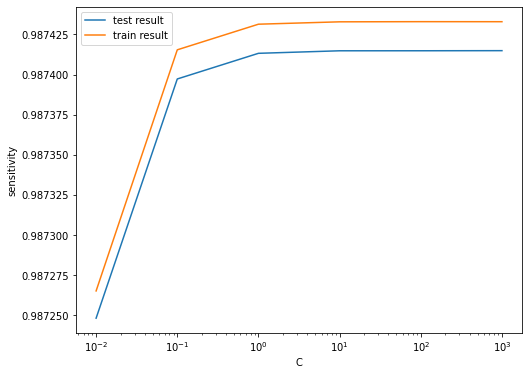

In [58]:
#plotting train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

Now we will perform hyperparameter tuning.

In [59]:

# Instantiating the model
logreg_oversampled_obj = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_oversampled_obj.fit(X_over_sampled, y_over_sampled) 

In [60]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over_sampled)

In [61]:
display_scores(y_over_sampled, y_train_pred)

F1 Score:  94.38
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



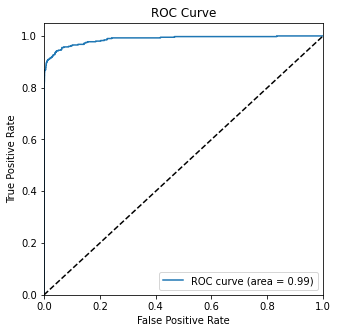

In [62]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over_sampled)[:,1]
# Plot the ROC curve
draw_roc(y_over_sampled, y_train_pred_proba)

In [63]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score:  10.53
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962



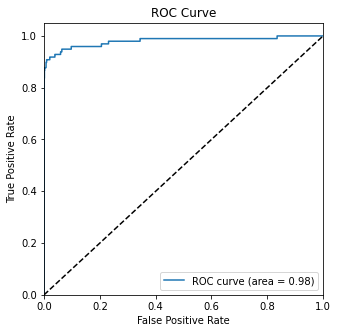

In [64]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Logistic Regression Model** gives the following results on test and train dataset for balanced data using **RandomOverSampler**:

Train Data:
      Recall = 92
      ,ROC = 0.99

Test Data:
      Recall = 92
      ,ROC = 0.98

**Decision Tree Model(RandomeOversampler data)**

In [65]:
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over_sampled, y_over_sampled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [66]:
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9986264127940342
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [67]:
# Model with optimal hyperparameters
dt_over_sampler_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_sampler_model.fit(X_over_sampled, y_over_sampled)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [68]:
# Predictions on the train set
y_train_pred = dt_over_sampler_model.predict(X_over_sampled)
display_scores(y_over_sampled, y_train_pred)

F1 Score:  99.44
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



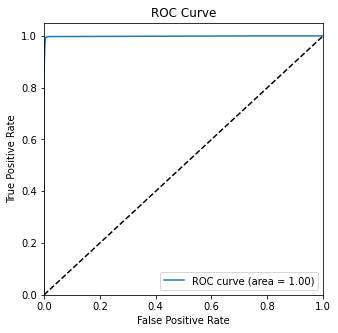

In [69]:
# Predicted probability
y_train_pred_proba = dt_over_sampler_model.predict_proba(X_over_sampled)[:,1]
# Plot the ROC curve
draw_roc(y_over_sampled, y_train_pred_proba)

In [70]:
# Evaluating model on the test data
y_test_pred = dt_over_sampler_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score:  28.67
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.82      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.64     56962
weighted avg       1.00      0.99      1.00     56962



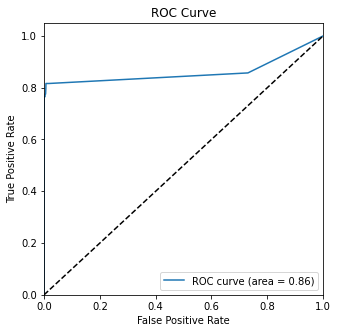

In [71]:
# Predicted probability
y_test_pred_proba = dt_over_sampler_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Decision Tree Model** gives the following results on test and train dataset for balanced data using **RandomOverSampler**:

Train Data:
      Recall = 99
      ,ROC = 1.00

Test Data:
      Recall = 82
      ,ROC = 0.86

**XGBoost with RandomOverSampled Data**

In [72]:
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_over_sampled, y_over_sampled)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 19.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [73]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,58.266960,1.069748,0.565930,0.002111,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999924,0.999920,0.999895,0.999913,0.000013,6,0.999917,0.999911,0.999928,0.999919,7.381949e-06
1,65.532548,0.921631,0.571326,0.002790,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999933,0.999931,0.999910,0.999925,0.000010,4,0.999931,0.999954,0.999936,0.999940,1.021057e-05
2,64.745177,0.160027,0.579445,0.010445,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999929,0.999936,0.999907,0.999924,0.000012,5,0.999943,0.999947,0.999935,0.999942,4.718247e-06
3,56.603120,0.856164,0.586476,0.013109,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999977,0.999996,0.999983,0.999985,0.000008,3,0.999998,1.000000,1.000000,0.999999,9.358602e-07
4,64.165057,0.350359,0.590270,0.004021,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999986,0.999994,0.999986,0.999989,0.000004,1,1.000000,1.000000,1.000000,1.000000,2.139476e-07
5,66.197930,0.398219,0.599346,0.007634,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999980,0.999993,0.999991,0.999988,0.000005,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [74]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)
print(model_cv.best_params_)

Best roc auc score :  0.9999886186166768
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)
{'learning_rate': 0.6, 'subsample': 0.6}


In [75]:
#Hyperparameter tuning
params = {'learning_rate': 0.6,
          'max_depth': 3, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_sample_model = XGBClassifier(params = params)
xgb_over_sample_model.fit(X_over_sampled, y_over_sampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [76]:
# Predictions on the train set
y_train_pred = xgb_over_sample_model.predict(X_over_sampled)

display_scores(y_over_sampled, y_train_pred)

F1 Score:  99.61
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.99      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



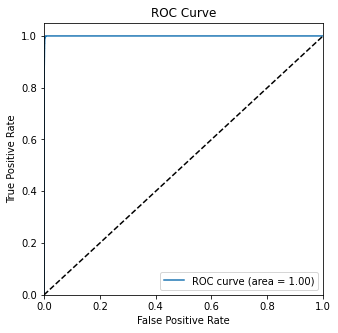

In [77]:
# Predicted probability
y_train_pred_proba = xgb_over_sample_model.predict_proba(X_over_sampled)[:,1]

# Plot the ROC curve
draw_roc(y_over_sampled, y_train_pred_proba)

In [78]:
y_test_pred = xgb_over_sample_model.predict(X_test.values)
display_scores(y_test, y_test_pred)

F1 Score:  36.33
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.23      0.91      0.36        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.68     56962
weighted avg       1.00      0.99      1.00     56962



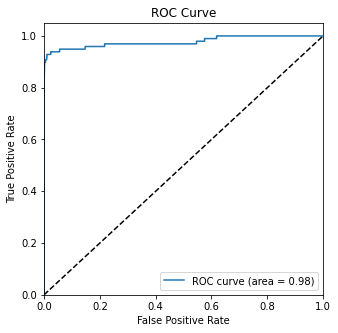

In [79]:
# Predicted probability
y_test_pred_proba = xgb_over_sample_model.predict_proba(X_test.values)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**XGBoost Model** gives the following results on test and train dataset for balanced data using **RandomOverSampler**:

Train Data:
      Recall = 100
      ,ROC = 1.00

Test Data:
      Recall = 90
      ,ROC = 0.98

**Model Building after applying SMOTE(Synthetic Minority Oversampling Technique)**

In [80]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote_data, y_train_smote_data = sm.fit_resample(X_train, y_train)

**1) Logistic Regression (with SMOTE data)**

In [81]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train_smote_data, y_train_smote_data)

print('Best ROC AUC score: ', model_cv.best_score_)
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.1min finished


Best ROC AUC score:  0.989824140381564
Best hyperparameters:  {'C': 1000}


In [82]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.048819,0.356612,0.054709,0.002274,0.01,{'C': 0.01},0.989435,0.989915,0.989897,0.989467,0.989811,0.989705,0.000211,6,0.989824,0.989627,0.989625,0.989762,0.989759,0.989719,0.000080
1,4.013722,0.168540,0.055460,0.002544,0.1,{'C': 0.1},0.989548,0.990016,0.989992,0.989574,0.989931,0.989812,0.000207,5,0.989930,0.989741,0.989728,0.989867,0.989868,0.989827,0.000079
2,3.921214,0.256172,0.054062,0.002419,1,{'C': 1},0.989559,0.990027,0.990001,0.989585,0.989943,0.989823,0.000207,4,0.989941,0.989752,0.989738,0.989878,0.989879,0.989838,0.000079
3,4.020691,0.284379,0.057239,0.007684,10,{'C': 10},0.989560,0.990028,0.990002,0.989586,0.989944,0.989824,0.000207,3,0.989942,0.989754,0.989739,0.989879,0.989880,0.989839,0.000079
4,3.985873,0.465477,0.057140,0.002169,100,{'C': 100},0.989560,0.990028,0.990002,0.989586,0.989945,0.989824,0.000207,2,0.989942,0.989754,0.989739,0.989879,0.989880,0.989839,0.000079
5,3.927543,0.273612,0.053967,0.002182,1000,{'C': 1000},0.989560,0.990028,0.990002,0.989586,0.989945,0.989824,0.000207,1,0.989942,0.989754,0.989739,0.989879,0.989880,0.989839,0.000079


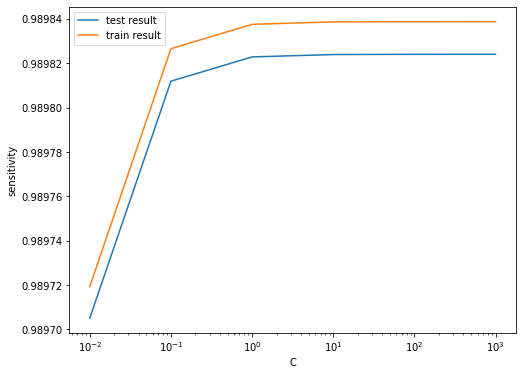

In [83]:
# plot of train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [84]:
# Instantiating the model
logreg_smote_model_obj = LogisticRegression(C=1000)

logreg_smote_model_obj.fit(X_train_smote_data, y_train_smote_data)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
# Evaluating on train data
y_train_pred = logreg_smote_model_obj.predict(X_train_smote_data)
display_scores(y_train_smote_data, y_train_pred)

F1 Score:  94.29
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



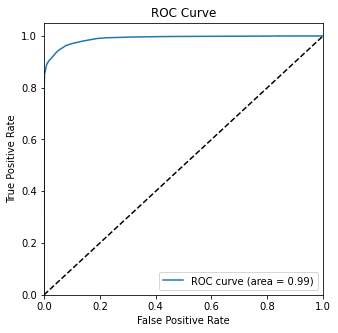

In [86]:
# Predicted probability
y_train_pred_proba_smote = logreg_smote_model_obj.predict_proba(X_train_smote_data)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote_data, y_train_pred_proba_smote)

In [87]:
# Evaluating on test data
y_test_pred = logreg_smote_model_obj.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score:  9.64
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



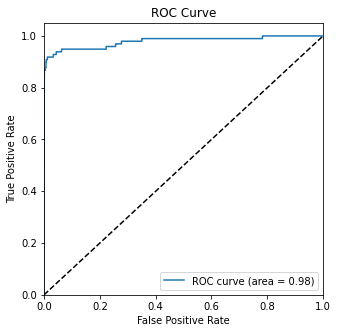

In [88]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model_obj.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)

**Logistic Regression Model** gives the following results on test and train dataset for balanced data using **SMOTE**:

Train Data:
      Recall = 92
      ,ROC = 0.99

Test Data:
      Recall = 92
      ,ROC = 0.98

**Decision Tree(with SMOTE)**

In [89]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote_data,y_train_smote_data)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [90]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9974911925837421
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [91]:
# Model with optimal hyperparameters
dt_smote_model_obj = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model_obj.fit(X_train_smote_data, y_train_smote_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [92]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model_obj.predict(X_train_smote_data)
display_scores(y_train_smote_data, y_train_pred_smote)

F1 Score:  98.69
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



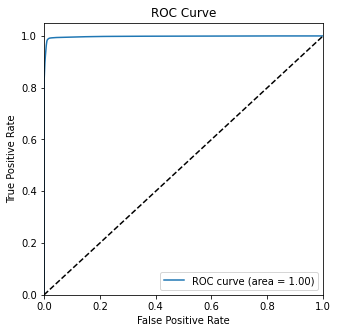

In [93]:
# Predicted probability
y_train_pred_proba = dt_smote_model_obj.predict_proba(X_train_smote_data)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote_data, y_train_pred_proba)

In [94]:
# Evaluating model on the test data
y_pred = dt_smote_model_obj.predict(X_test)
display_scores(y_test, y_pred)

F1 Score:  16.43
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.84      0.16        98

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962



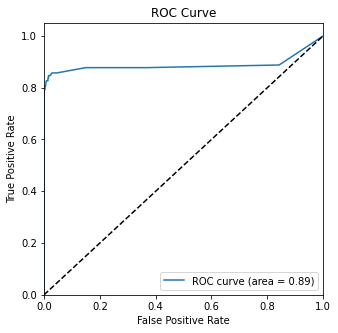

In [95]:
# Predicted probability
y_test_pred_smote = dt_smote_model_obj.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)

**Decision Tree Model** gives the following results on test and train dataset for balanced data using **SMOTE**:

Train Data:
      Recall = 99
      ,ROC = 1.00

Test Data:
      Recall = 84
      ,ROC = 0.89

**XGBoost(using SMOTE)**

In [96]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=100)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote_data, y_train_smote_data)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 16.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [97]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,47.284947,2.521587,0.430861,0.009503,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.998475,0.998757,0.998565,0.998599,0.000118,4,0.998583,0.998739,0.998635,0.998652,0.000065
1,56.034334,2.822271,0.432955,0.004233,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.998483,0.998707,0.998528,0.998573,0.000097,5,0.998591,0.998718,0.998613,0.998641,0.000055
2,56.339386,0.614445,0.430717,0.004238,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.998597,0.998619,0.998484,0.998567,0.000059,6,0.998703,0.998612,0.998586,0.998634,0.000050
3,43.346219,0.286954,0.452861,0.005970,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999769,0.999798,0.999782,0.999783,0.000011,2,0.999806,0.999829,0.999802,0.999812,0.000012
4,55.033192,1.726343,0.449092,0.003606,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999771,0.999794,0.999779,0.999781,0.000009,3,0.999821,0.999812,0.999814,0.999816,0.000004
5,59.452001,4.123918,0.464131,0.006710,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999786,0.999798,0.999802,0.999795,0.000007,1,0.999844,0.999836,0.999835,0.999838,0.000004


In [98]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9997954006027809
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


In [99]:
# hyperparameters tuning
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':100,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model_obj = XGBClassifier(params = params)
xgb_smote_model_obj.fit(X_train_smote_data, y_train_smote_data)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [100]:
#Evaluating model on train data
y_train_pred = xgb_smote_model_obj.predict(X_train_smote_data)
display_scores(y_train_smote_data, y_train_pred)

F1 Score:  98.1
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98    227451
           1       0.99      0.97      0.98    227451

    accuracy                           0.98    454902
   macro avg       0.98      0.98      0.98    454902
weighted avg       0.98      0.98      0.98    454902



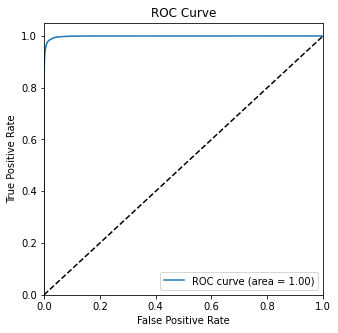

In [101]:
# Predicted probability
y_train_pred_proba_smote = xgb_smote_model_obj.predict_proba(X_train_smote_data)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote_data, y_train_pred_proba_smote)

In [102]:
#Evaluating on test data
y_pred = xgb_smote_model_obj.predict(X_test.values)
display_scores(y_test, y_pred)

F1 Score:  22.14
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



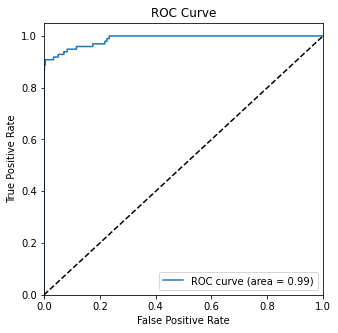

In [103]:
# Predicted probability
y_test_pred_proba = xgb_smote_model_obj.predict_proba(X_test.values)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**XGBoost Model** gives the following results on test and train dataset for balanced data using **SMOTE**:

Train Data:
      Recall = 97
      ,ROC = 1.00

Test Data:
      Recall = 91
      ,ROC = 0.99

Using **ADASYN (Adaptive Synthetic Sampling)** to balance the dataset.

In [104]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

**Logistic Regression(using ADASYN data)**

In [105]:
folds = KFold(n_splits=3, shuffle=True, random_state=4)
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#printing the evaluation result
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.2min finished


Best ROC AUC score:  0.9644540936864764
Best hyperparameters:  {'C': 100}


In [106]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,3.294073,0.057091,0.095733,0.008963,0.01,{'C': 0.01},0.963707,0.964510,0.964360,0.964192,0.000349,6,0.964453,0.963898,0.964307,0.964220,0.000235
1,3.280518,0.232014,0.086631,0.000504,0.1,{'C': 0.1},0.963964,0.964745,0.964586,0.964432,0.000337,5,0.964696,0.964139,0.964548,0.964461,0.000236
2,3.874989,0.202398,0.087389,0.001915,1,{'C': 1},0.963986,0.964765,0.964605,0.964452,0.000336,4,0.964715,0.964159,0.964567,0.964480,0.000235
3,3.989227,0.229860,0.093911,0.000864,10,{'C': 10},0.963988,0.964767,0.964607,0.964454,0.000336,3,0.964717,0.964161,0.964569,0.964482,0.000235
4,3.853247,0.133571,0.089136,0.004175,100,{'C': 100},0.963988,0.964767,0.964607,0.964454,0.000336,1,0.964718,0.964161,0.964569,0.964482,0.000236
5,3.724474,0.147369,0.094363,0.004784,1000,{'C': 1000},0.963988,0.964767,0.964607,0.964454,0.000336,2,0.964718,0.964161,0.964569,0.964482,0.000236


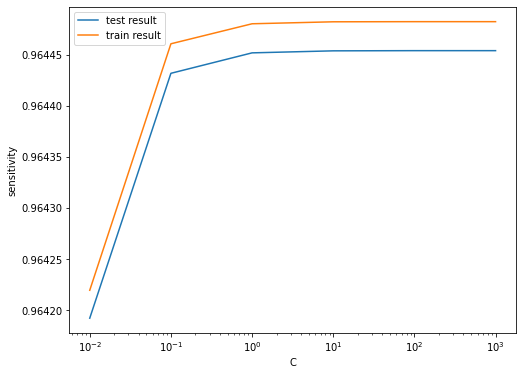

In [107]:
# plotting of train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [108]:
# Instantiating the model
logreg_adasyn_model_obj = LogisticRegression(C=100)

# Fitting the model 
logreg_adasyn_model_obj.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
# Evaluating on traning data
y_train_pred = logreg_adasyn_model_obj.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score:  89.47
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    227451
           1       0.91      0.88      0.89    227447

    accuracy                           0.90    454898
   macro avg       0.90      0.90      0.90    454898
weighted avg       0.90      0.90      0.90    454898



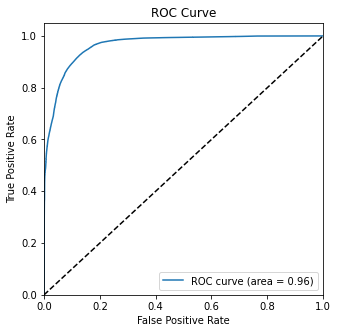

In [110]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model_obj.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [111]:
# Evaluating on test data
y_pred = logreg_adasyn_model_obj.predict(X_test)
display_scores(y_test, y_pred)

F1 Score:  3.37
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



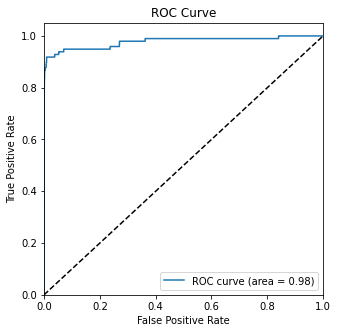

In [112]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model_obj.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Logistic Regression Model** gives the following results on test and train dataset for balanced data using **ADASYN**:

Train Data:
      Recall = 88
      ,ROC = 0.96

Test Data:
      Recall = 95
      ,ROC = 0.98

**Decision Tree(using ADASYN data)**

In [113]:
# Creating the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dt, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 5, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         

In [114]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9480477981173477
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [115]:
# Model with optimal hyperparameters
dt_adasyn_model_obj = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_adasyn_model_obj.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [116]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model_obj.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score:  97.4
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    227451
           1       0.96      0.99      0.97    227447

    accuracy                           0.97    454898
   macro avg       0.97      0.97      0.97    454898
weighted avg       0.97      0.97      0.97    454898



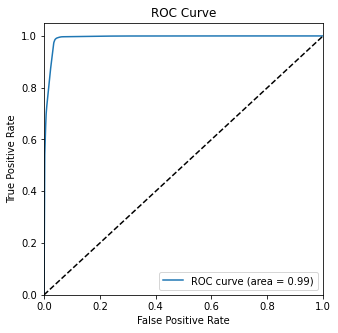

In [117]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model_obj.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [118]:
# Evaluating model on the test data
y_pred = dt_adasyn_model_obj.predict(X_test)
display_scores(y_test, y_pred)

F1 Score:  6.93
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.52     56962
weighted avg       1.00      0.96      0.98     56962



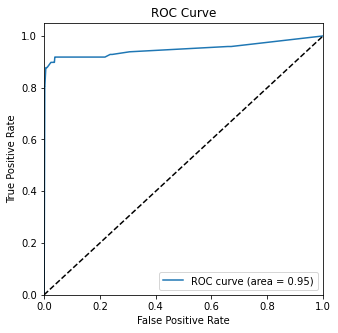

In [119]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model_obj.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Decision Tree Model** gives the following results on test and train dataset for balanced data using **ADASYN**:

Train Data:
      Recall = 99
      ,ROC = 0.99

Test Data:
      Recall = 92
      ,ROC = 0.95

**XGBoost(using ADASYN balanced data)**

In [120]:
# creating a KFold object 
folds = 3

# specifying range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          
# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 31.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [121]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,85.396450,1.589272,1.027330,0.295864,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.980836,0.968071,0.995063,0.981323,0.011025,6,0.999069,0.999207,0.998888,0.999054,0.000131
1,108.629052,2.290394,0.870853,0.068224,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982780,0.966938,0.995224,0.981647,0.011575,4,0.999074,0.999254,0.998842,0.999057,0.000169
2,110.753506,2.136621,0.822913,0.010585,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.983119,0.966302,0.995158,0.981526,0.011834,5,0.999028,0.999233,0.998818,0.999026,0.000169
3,83.339116,1.370775,0.831755,0.012484,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.991608,0.967257,0.998947,0.985937,0.013544,2,0.999935,0.999915,0.999915,0.999921,0.000010
4,115.042115,5.353350,0.861556,0.029509,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.994607,0.970756,0.998897,0.988087,0.012379,1,0.999936,0.999941,0.999907,0.999928,0.000015
5,113.376222,7.631213,0.824891,0.007206,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.991032,0.963911,0.998769,0.984571,0.014946,3,0.999935,0.999937,0.999920,0.999930,0.000008


In [122]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.988086594658616
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [123]:
# hyperparameters tuning
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model_obj = XGBClassifier(params = params)
xgb_adasyn_model_obj.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [124]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model_obj.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score:  97.56
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98    227451
           1       0.97      0.99      0.98    227447

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898



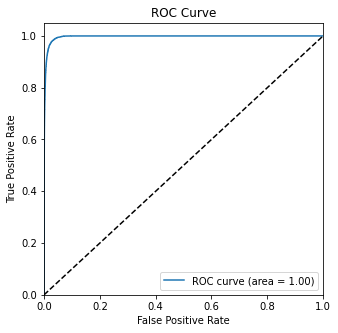

In [125]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model_obj.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [126]:
y_pred = xgb_adasyn_model_obj.predict(X_test.values)
display_scores(y_test, y_pred)

F1 Score:  8.39
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962



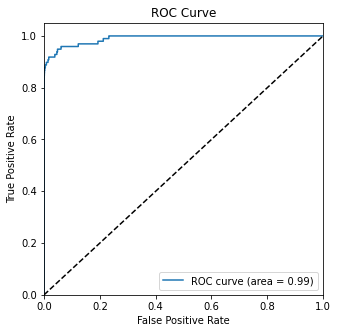

In [127]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model_obj.predict_proba(X_test.values)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**XGBoost Model** gives the following results on test and train dataset for balanced data using **ADASYN**:

Train Data:
      Recall = 99
      ,ROC = 1

Test Data:
      Recall = 92
      ,ROC = 0.99

**Select the oversampling method which shows the best result on a model**

From our analysis we can see that XGBoost model couple with **ADASYN** balanced data workes the best. So we will be selecting **XGBoost (with ADASYN)** as our final model.

**Print the important features of the best model to understand the dataset**

Top var = 14
2nd Top var = 4
3rd Top var = 15


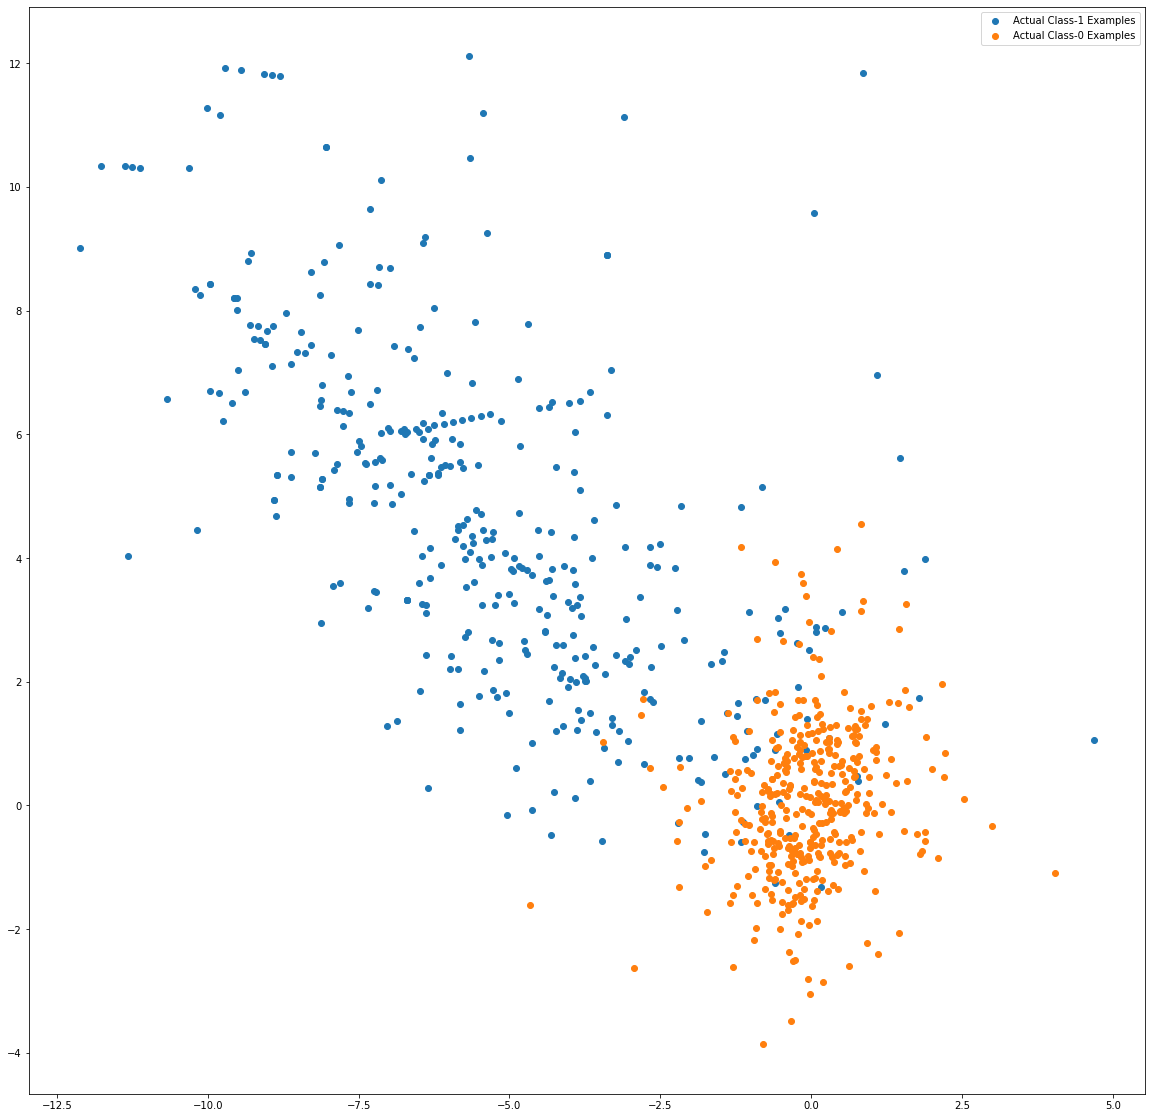

In [129]:
var_imp = []
for i in xgb_adasyn_model_obj.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model_obj.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model_obj.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model_obj.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model_obj.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model_obj.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

**Print the FPR,TPR & select the best threshold from the roc curve**

In [130]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9968394109066661
0.5383439


**In Conclusion XGBoost coupled with data that has been balanced using the ADASYN technique gives us the best result with an ROC score of 99% and a high Recall of 92%.**